# Fake News Detection using Naïve Bayes

We have created a model to determine if a piece of news is fake or not, based on its title. We have used 3 Naïve Bayes algorithms, namely Gaussian, Bernoulli and Multinomial.

**About Dataset**

The dataset that we have used is from [Kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset) and submitted by [Clément Bisaillon](https://www.kaggle.com/clmentbisaillon)

Dataset: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

The zip file contains two csv files


*   Fake.csv
*   True.csv

Both files contain 4 columns. Fake.csv contains 23481 rows and True.csv contains 21417 rows.

###About The Model
Naïve Bayes has proven to not only be simple but also fast, accurate, and reliable Machine Learning algorithm, that works really well with `Natural Language Processing (NLP)`-related problems.

Naïve Bayes is a probabilistic machine learning algorithm based on the Bayes Theorem, used in a wide variety of classification tasks.

**Bayes Theorem**

Bayes Theorem is conditional probability is a measure of the probability of an event occurring given that another event has (by assumption, presumption, assertion, or evidence) occurred.

![picture](https://www.kdnuggets.com/wp-content/uploads/bayes-nagesh-1.jpg)
<center>Source: https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html</center>



###Installing kaggle and importing datasets
We've installed kaggle on our Google Colab notebook and imported the dataset [Fake and real news dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset). 

In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download clmentbisaillon/fake-and-real-news-dataset

 61% 25.0M/41.0M [00:00<00:00, 111MB/s] 
100% 41.0M/41.0M [00:00<00:00, 138MB/s]


After downloading the dataset, we have to unzip the zip file.

In [3]:
!unzip fake-and-real-news-dataset

Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


###Importing All Dependencies

In [4]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

We have created two dataframes from the two CSV files that we have from Kaggle.

In [6]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [7]:
true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [8]:
fake.shape

(23481, 4)

In [9]:
true.shape

(21417, 4)

In [10]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Dropping the column `subject`, `date` and `text` as we do not require them.

In [11]:
fake.drop(['subject','date', 'text'], axis=1, inplace=True)

We don't have any target column in the files. Therefore, we added 0 in all rows in a newly created column in Fake.csv file, using list comprehension.

In [12]:
fake['target'] = pd.Series([0 for x in range(len(fake.index))])

In [13]:
fake.head()

,title,target
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


Dropping the column `subject`, `date` and `text` as we do not require them.

In [14]:
true.drop(['subject','date','text'], axis=1, inplace=True)

We don't have any target column in the files. Therefore, we added 1 in all rows in a newly created column in True.csv file, using list comprehension.

In [15]:
true['target'] = pd.Series([1 for x in range(len(true.index))])

In [16]:
true.head()

,title,target
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


Due to our limitation in computing power, we cannot keep all the rows in the two files and instead keep only 5000 rows from each of the files.

In [17]:
true.drop(true.index[5000:], inplace=True)

In [18]:
true.shape

(5000, 2)

In [19]:
fake.drop(fake.index[5000:], inplace=True)

In [20]:
fake.shape

(5000, 2)

###Merging the two dataframes
Since, we now have target column inboth the files, we can merge them and create a new dataframe `data`

In [22]:
data = fake.append(true, ignore_index=True)
data.head()

,title,target
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


In [23]:
data.tail()

,title,target
9995,U.S. Agriculture secretary nominee submits eth...,1
9996,Trump aides attack agency that will analyze he...,1
9997,Highlights: The Trump presidency on March 12 a...,1
9998,Obama lawyers move fast to join fight against ...,1
9999,Mike Pence to tour Asia next month amid securi...,1


In [24]:
data.shape

(10000, 2)

We're going to shuffle the dataset to randomize our data resetting the `index`

In [25]:
data = data.sample(frac=1, random_state=1, ignore_index=True)

In [26]:
data.head()

,title,target
0,U.S. government says 12.2 million consumers in...,1
1,Teacher Tells Black Students He’ll Have Trump...,0
2,WATCH: Louisiana Governor Tells Republicans T...,0
3,Couple Married 37 Years In Disagreement On El...,0
4,U.S. Treasury would run out of cash by early A...,1


In [27]:
data.tail()

,title,target
9995,Dan Rather Takes Kellyanne Conway To The Wood...,0
9996,"Among Trump associates, concern and frustratio...",1
9997,Trump Spoke With Putin About Election Interfe...,0
9998,Factbox: Trump on Twitter (December 12) - Demo...,1
9999,GOP Lawmaker: Republicans Are Freaking Out Ab...,0


##Pre-processing
###Letter Case and Punctuation
Let's start by removing punctuations and making all the words lowercase.

In [28]:
data['title'] = data['title'].str.replace('\W', ' ') #Removes punctuation
data['title'] = data['title'].str.lower() #Turns into lowercase
data.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,title,target
0,u s government says 12 2 million consumers in...,1
1,teacher tells black students he ll have trump...,0
2,watch louisiana governor tells republicans t...,0


###Converting Strings into categorical values
As of now, we only have strings as our feature, which we must split into words and turn these words into categorical values.

In [29]:
data['title'] = data['title'].str.split()
vocabulary_title = []
for title in data['title']:
   for word in title:
      vocabulary_title.append(word)

vocabulary_title = list(set(vocabulary_title))

In [30]:
word_counts_per_title = {unique_word: [0] * len(data['title']) for unique_word in vocabulary_title}
for index, title in enumerate(data['title']):
   for word in title:
      word_counts_per_title[word][index] += 1

In [31]:
len(word_counts_per_title)

10132

Let's create a dataframe from the dictionary `word_counts`

In [32]:
word_counts = pd.DataFrame(word_counts_per_title)

In [33]:
word_counts.head()

,gullible,legitimate,obvious,twice,delighted,personalities,seized,tennessee,figuring,judicial,...,cleverly,erase,wore,toast,hispanics,unfulfilled,loaded,21,atheletes,sanguine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data.head()

,title,target
0,"[u, s, government, says, 12, 2, million, consu...",1
1,"[teacher, tells, black, students, he, ll, have...",0
2,"[watch, louisiana, governor, tells, republican...",0
3,"[couple, married, 37, years, in, disagreement,...",0
4,"[u, s, treasury, would, run, out, of, cash, by...",1


###Splitting Dataframe into Features and Targets
We are splitting our dataframe into Features and Targets, and saving them in the variables `X` and `y`

In [36]:
X = word_counts
y = data[['target']]

###Splitting Train and Test Datasets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

We're going to import `GaussianNB`,`BernoulliNB` and `MultinomialNB` from `sklearn.naive_bayes`

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [39]:
X_train.head()

,gullible,legitimate,obvious,twice,delighted,personalities,seized,tennessee,figuring,judicial,...,cleverly,erase,wore,toast,hispanics,unfulfilled,loaded,21,atheletes,sanguine
7681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y_train.head()

,target
7681,0
9031,1
3691,1
202,0
5625,1


###Importing `Metrics` from `Scikit Learn`

In [41]:
from sklearn import metrics

##Gaussian Naïve Bayes

In [67]:
gnb = GaussianNB()

In [68]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
print("Gaussian Naïve Bayes Algorithm's Accuracy Score:",metrics.accuracy_score(y_test, y_pred))

Gaussian Naïve Bayes Algorithm's Accuracy Score: 0.87


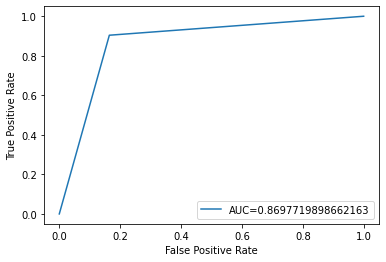

In [72]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##Bernoulli Naïve Bayes

In [73]:
clf = BernoulliNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
print("Bernoulli Naïve Bayes Algorithm's Accuracy Score:",metrics.accuracy_score(y_test, y_pred))

Bernoulli Naïve Bayes Algorithm's Accuracy Score: 0.9526666666666667


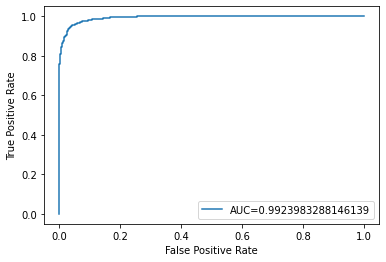

In [76]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##Multinomial Naïve Bayes

In [77]:
mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
print("Multinomial Naïve Bayes Algorith's Accuracy Score:",metrics.accuracy_score(y_test, y_pred))

Multinomial Naïve Bayes Algorith's Accuracy Score: 0.95


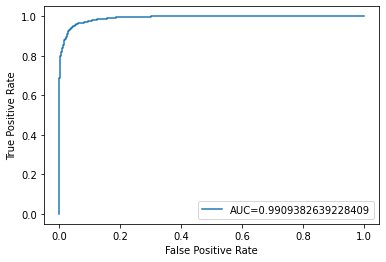

In [79]:
y_pred_proba = mnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##Conclusion and Limitations
We used 3 popular Naïve Bayes algorithms of `Scikit Learn` library - Gaussian, Bernoulli and Multinomial. The accuracy scores are as follow:


1.   Gaussian Naïve Bayes - 0.87 (87%)
2.   Bernoulli Naïve Bayes - 0.9525 (95.25%)
3.   Multinomial Naïve Bayes - 0.95 (95%)

Clearly, Bernoulli Naïve Bayes is proven to be the most effective algorithm for detecting Fake News.

Due to some limitation in our computing capacity, we could not use all 44,898 rows and used 10,000 rows instead. This model can be tested on larger datasets.